In [61]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import sklearn

In [64]:
bank_churn1=pd.read_csv("/content/drive/MyDrive/Survey Sparrow/BankChurners.csv")
bank_churn2=pd.read_csv("/content/drive/MyDrive/Survey Sparrow/Bank_churn.csv")
travel=pd.read_csv("/content/drive/MyDrive/Survey Sparrow/Customertravel.csv")
orange=pd.read_csv("/content/drive/MyDrive/Survey Sparrow/Customertravel.csv")

In [65]:
bank_churn1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   clientnum                                                                                                                           10127 non-null  int64  
 1   churn                                                                                                                               10127 non-null  int64  
 2   customer_age                                                                                                                        10127 non-null  int64  
 3   gender                                                                           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         954 non-null    int64 
 1   frequentflyer               954 non-null    object
 2   annualincomeclass           954 non-null    object
 3   servicesopted               954 non-null    int64 
 4   accountsyncedtosocialmedia  954 non-null    object
 5   bookedhotelornot            954 non-null    object
 6   churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


None


In [66]:
travel.head()

,age,frequentflyer,annualincomeclass,servicesopted,accountsyncedtosocialmedia,bookedhotelornot,churn
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [67]:
!pip install shap

In [68]:
import sklearn

import shap

# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43
...,...,...,...,...,...,...,...,...
13339,5.7530,14.0,6.071023,0.980114,1151.0,3.269886,34.03,-117.66
2791,1.8325,25.0,4.279221,1.070130,1477.0,1.918182,37.37,-118.39
1550,6.8806,16.0,8.273632,1.042289,1272.0,3.164179,37.74,-121.93
17652,3.8936,13.0,4.128079,1.160099,710.0,1.748768,37.26,-121.88


In [69]:
def encode_non_int_columns(df):
    encoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtype != 'int64' and df[col].dtype != 'int32':
            df[col] = encoder.fit_transform(df[col])
    return df

In [70]:
data1=encode_non_int_columns(travel)

In [20]:
data1.head()

,age,frequentflyer,annualincomeclass,servicesopted,accountsyncedtosocialmedia,bookedhotelornot,churn
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [71]:
data1.columns

Index(['age', 'frequentflyer', 'annualincomeclass', 'servicesopted',
       'accountsyncedtosocialmedia', 'bookedhotelornot', 'churn'],
      dtype='object')

In [72]:
X=data1[['age', 'frequentflyer', 'annualincomeclass', 'servicesopted',
       'accountsyncedtosocialmedia', 'bookedhotelornot']]
y=data1['churn']

In [24]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [73]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

age = -0.01549
frequentflyer = 0.12812
annualincomeclass = -0.13726
servicesopted = 0.04546
accountsyncedtosocialmedia = 0.10325
bookedhotelornot = -0.09279


In [74]:
X100 = shap.utils.sample(X, 100)

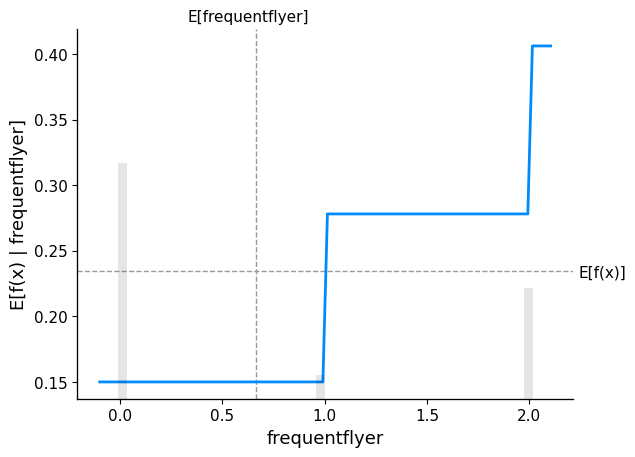

In [75]:
shap.partial_dependence_plot(
    "frequentflyer",
    model.predict,
    X,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

In [76]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

NameError: name 'sample_ind' is not defined

In [77]:
#Reference ------------>https://shap.readthedocs.io/en/stable/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [50]:
X_preprocessed

array([[ 0.56690365, -0.73016416,  1.01680185,  2.21932995, -0.77849894,
         1.2344268 ],
       [ 0.56690365,  1.4741922 , -0.3610802 ,  1.59642887,  1.28452326,
        -0.81009259],
       [ 1.46628183, -0.73016416,  1.01680185,  0.35062671,  1.28452326,
        -0.81009259],
       ...,
       [ 1.46628183, -0.73016416,  1.01680185,  0.97352779, -0.77849894,
        -0.81009259],
       [-0.63226726, -0.73016416, -0.3610802 , -0.89517545,  1.28452326,
         1.2344268 ],
       [-0.33247453,  1.4741922 , -1.73896225, -0.89517545, -0.77849894,
        -0.81009259]])

In [51]:
shap_values

array([[[ 0.08879338, -0.08879338],
        [ 0.06874782, -0.06874782],
        [ 0.0864145 , -0.0864145 ],
        [-0.08093218,  0.08093218],
        [ 0.02416694, -0.02416694],
        [ 0.04878439, -0.04878439]],

       [[ 0.05606342, -0.05606342],
        [-0.28555203,  0.28555203],
        [-0.06781523,  0.06781523],
        [-0.19690575,  0.19690575],
        [-0.20522629,  0.20522629],
        [-0.06458927,  0.06458927]],

       [[-0.00172249,  0.00172249],
        [ 0.12671761, -0.12671761],
        [ 0.1767305 , -0.1767305 ],
        [ 0.00680895, -0.00680895],
        [-0.04658776,  0.04658776],
        [-0.02597197,  0.02597197]],

       ...,

       [[ 0.0338183 , -0.0338183 ],
        [ 0.06734644, -0.06734644],
        [ 0.0779501 , -0.0779501 ],
        [ 0.04393301, -0.04393301],
        [ 0.03173702, -0.03173702],
        [-0.01881003,  0.01881003]],

       [[ 0.02035197, -0.02035197],
        [ 0.13319681, -0.13319681],
        [-0.03015277,  0.03015277],
       